In [1]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import numpy as np

In [2]:
vanilla = np.load('npy/correct_classes_all_vanilla.npy')
cutmix = np.load('npy/correct_classes_all_cutmix.npy')
cutmix_dr = np.load('npy/correct_classes_all_cutmix_d0.1_.npy')
cutmix_dr_2 = np.load('npy/correct_classes_all_cutmix_d0.2_.npy')
cutmix_df = np.load('npy/correct_classes_all_cutmix_d25_.npy')

In [3]:
vanilla_avg = np.average(vanilla, axis=0) * 2 #/numberofclass*100
cutmix_avg = np.average(cutmix, axis=0) * 2 #/numberofclass*100
cutmix_dr_avg = np.average(cutmix_dr, axis=0) * 2 #/numberofclass*100
cutmix_dr_2_avg = np.average(cutmix_dr_2, axis=0) * 2
cutmix_df_avg = np.average(cutmix_df, axis=0) * 2 #/numberofclass*100

In [4]:
np.savetxt("npy/foo.csv", cutmix_df_avg, delimiter=",")

In [5]:
cutmix_delta = cutmix_avg - vanilla_avg
cutmix_dr_delta = cutmix_dr_avg - vanilla_avg

In [6]:
np.average(cutmix_delta), np.average(cutmix_dr_delta)

(0.8563999999999998, 0.9984000000000001)

In [7]:
mixup_diff = np.sort(cutmix_delta)[::-1]
ignore_diff = np.sort(cutmix_dr_delta)[::-1]

In [8]:
mixup_diff_idx = np.argsort(cutmix_delta)[::-1]
cutmix_deltas = cutmix * 2 - vanilla_avg
# np.average(cutmix_deltas, axis=0), cutmix_delta
cutmix_deltas.shape

(5, 1000)

In [9]:
np.argsort(cutmix_delta)[:339]

array([817, 908, 285, 238, 266, 844, 836, 385, 778, 506, 526, 618, 630,
       585, 409,  46, 204, 600, 516, 494, 345, 691, 159, 248, 764, 193,
       578, 693, 457, 650, 587, 303, 705, 689, 493, 433, 714, 970, 265,
       902, 606, 487, 878, 158, 499, 740, 838, 429, 742, 830, 931, 542,
       362, 240, 676, 816, 647, 170, 515, 341, 748, 975, 848, 807, 910,
       186, 273, 696, 545, 699, 459, 654, 629, 505, 617, 108, 575, 777,
        99, 999, 885, 231, 146, 483, 380, 804, 484, 597, 234, 940, 786,
         2,  77, 488, 653, 428, 745, 522,  25, 220, 800, 596, 546, 163,
       243, 808, 928, 557, 422, 744, 390, 904, 206, 780, 756, 873, 765,
       377,   7, 697, 828, 721, 729,  19, 701, 881, 215, 181, 852, 176,
       120, 512, 323, 319, 264, 511, 513, 572, 121, 978, 507, 311, 731,
       452, 153, 857, 262, 711, 147, 751, 962, 383, 938, 621, 182, 622,
       226, 530, 381, 174, 263,  18, 864,  53, 297, 257, 884, 843, 162,
       210, 917, 216, 217, 411, 103, 763, 223, 233, 191, 685, 25

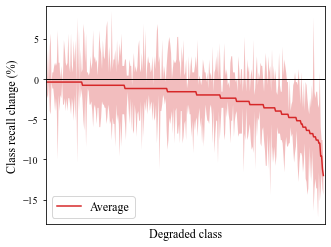

In [10]:
# degraded scatter
font_size = 12
k = 687

fig = plt.figure(figsize = (5, 4))
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.0)

plt.plot(cutmix_delta[mixup_diff_idx][k:], color = 'tab:red', label = 'Average')

x = np.arange(1000-k)
plt.fill_between(x, np.max(cutmix_deltas, axis=0)[mixup_diff_idx][k:], np.min(cutmix_deltas, axis=0)[mixup_diff_idx][k:], facecolor='tab:red', alpha=0.3)

plt.ylabel("Class recall change (%)", fontsize=font_size)
plt.xlabel("Degraded class", fontsize=font_size)
plt.xticks(ticks= []) #x축 tick 제거
plt.rc('ytick', labelsize=font_size-2)
plt.legend(loc='lower left', fontsize=font_size)
plt.margins(x=0.005, y=0.01, tight=True)

plt.ylim([-18, 9])

plt.savefig('fig/degraded_scatter_imagenet.png', dpi=300, bbox_inches='tight', pad_inches=0.05)


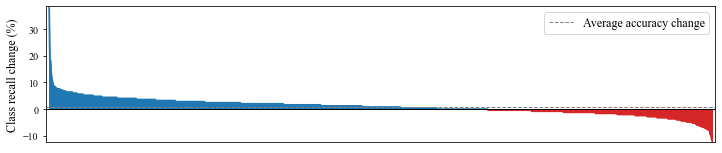

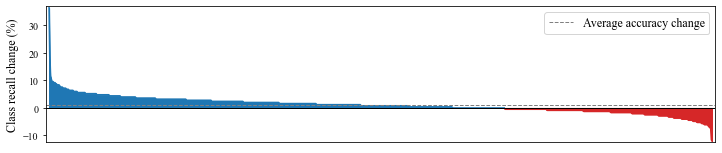

In [30]:
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='gray', linestyle='--', lw=1, label='Average accuracy change')]

font_size = 12
i = 1
for y, title in [(mixup_diff, 'After Mixup'), (ignore_diff, 'After DropMix-R')]:
    inc = np.average(y)
    colors = []
    for idx, diff in enumerate(y):
        if diff < 0:
            k = idx
            break
#         color = 'tab:blue' if diff > 0 else 'tab:red'
#         colors.append(color)
    fig, ax = plt.subplots(figsize=(12,2.5))
    ax.patch.set_alpha(0)
    x = [str(x) for x in np.arange(1000)]
#     ax.bar(x, y, color=colors)
    ax.plot(x[:k],y[:k], color = 'tab:blue')
    ax.fill_between(x[:k],y[:k], color = 'tab:blue')
    ax.plot(x[k:],y[k:], color = 'tab:red')
    ax.fill_between(x[k:],y[k:], color = 'tab:red')

    plt.axhline(y=inc, color='gray', linestyle='--', linewidth=1.0)
    plt.axhline(y=0, color='black', linestyle='-', linewidth=1.0)

    plt.xticks(ticks= []) #x축 tick 제거
    plt.margins(x=0.005, y=0.01, tight=True)
#     plt.ylim(0, 40)
    plt.ylabel("Class recall change (%)", fontsize=font_size)
    plt.rc('ytick', labelsize=font_size-2)
    ax.legend(handles=legend_elements, loc='upper right', fontsize = font_size)
    plt.savefig('fig/imagenet_cutmix_limless_'+str(i)+'.png', dpi=300, bbox_inches='tight', pad_inches=0.05)
    plt.show()
    i=i+1


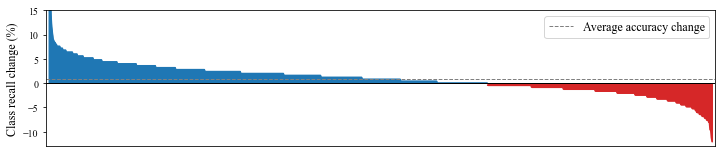

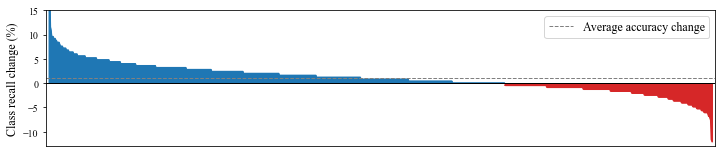

In [31]:
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='gray', linestyle='--', lw=1, label='Average accuracy change')]

font_size = 12
i = 1
for y, title in [(mixup_diff, 'After Mixup'), (ignore_diff, 'After DropMix-R')]:
    inc = np.average(y)
    colors = []
    for idx, diff in enumerate(y):
        if diff < 0:
            k = idx
            break
#         color = 'tab:blue' if diff > 0 else 'tab:red'
#         colors.append(color)
    fig, ax = plt.subplots(figsize=(12,2.5))
    ax.patch.set_alpha(0)
    x = [str(x) for x in np.arange(1000)]
#     ax.bar(x, y, color=colors)
    ax.plot(x[:k],y[:k], color = 'tab:blue')
    ax.fill_between(x[:k],y[:k], color = 'tab:blue')
    ax.plot(x[k:],y[k:], color = 'tab:red')
    ax.fill_between(x[k:],y[k:], color = 'tab:red')

    plt.axhline(y=inc, color='gray', linestyle='--', linewidth=1.0)
    plt.axhline(y=0, color='black', linestyle='-', linewidth=1.0)

    plt.xticks(ticks= []) #x축 tick 제거
    plt.margins(x=0.005, y=0.01, tight=True)
    plt.ylim(-13, 15)
    plt.ylabel("Class recall change (%)", fontsize=font_size)
    plt.rc('ytick', labelsize=font_size-2)
    ax.legend(handles=legend_elements, loc='upper right', fontsize = font_size)
    plt.savefig('fig/imagenet_cutmix_lim_'+str(i)+'.png', dpi=300, bbox_inches='tight', pad_inches=0.05)
    plt.show()
    i=i+1


In [51]:
k

999

In [33]:
mixup_class_idx = [64, 83, 78, 66, 13, 26, 51, 98, 3, 18, 92, 58, 59, 95, 75, 14, 97, 69, 15, 30, 99, 19, 91, 73, 86, 87, 49, 1, 57, 6, 28, 11, 22, 41, 16, 71, 24, 65, 52, 29, 68, 38, 36, 77, 39, 48, 43, 56, 53, 34, 84, 12, 2, 89, 4, 54, 82, 21, 67, 5, 85, 25, 20, 50, 76, 62, 88, 93, 47, 81, 7, 79, 8, 46, 72, 61, 60, 80, 40, 42, 37, 9, 17, 23, 90, 33, 31, 74, 44, 10, 55, 94, 0, 35, 70, 96, 45, 63, 32, 27]
ignore_class_idx = [3, 11, 26, 83, 66, 69, 64, 92, 58, 46, 51, 14, 95, 97, 29, 91, 52, 54, 5, 85, 18, 22, 41, 13, 30, 57, 89, 93, 24, 53, 73, 86, 75, 78, 96, 28, 38, 12, 1, 98, 34, 19, 6, 39, 62, 4, 74, 71, 68, 88, 7, 49, 48, 59, 43, 15, 84, 82, 72, 42, 37, 10, 87, 56, 20, 81, 8, 23, 2, 99, 16, 44, 67, 76, 36, 25, 35, 31, 9, 0, 70, 21, 50, 79, 61, 17, 63, 65, 33, 60, 77, 40, 90, 94, 27, 80, 45, 47, 32, 55]
mixup_class_idx_str = [str(x) for x in mixup_class_idx]
ignore_class_idx_str = [str(x) for x in ignore_class_idx]

mixup_class_name = ['possum', 'sweet_pepper', 'raccoon', 'snake', 'bus', 'cra', 'mushroom', 'woman', 'bear', 'caterpillar', 'tulip', 'pickup_truck', 'pine_tree', 'whale', 'skunk', 'butterfly', 'wolf', 'rocket', 'camel', 'dolphin', 'worm', 'cattle', 'trout', 'aquarium_fish', 'mountain', 'shark', 'telephone', 'television', 'pear', 'bee', 'cup', 'boy', 'clock', 'lawn_mower', 'can', 'cockroach', 'sea', 'dinosaur', 'oak_tree', 'rabbit', 'road', 'hamster', 'kangaroo', 'keyboard', 'motorcycle', 'snail', 'lion', 'orange', 'palm_tree', 'fox', 'bridge', 'table', 'baby', 'tractor', 'beaver', 'orchid', 'sunflower', 'chimpanzee', 'bed', 'ray', 'tank', 'chair', 'couch', 'mouse', 'skyscraper', 'poppy', 'tiger', 'maple_tree', 'turtle', 'beetle', 'spider', 'streetcar', 'bicycle', 'man', 'seal', 'plate', 'plain', 'lamp', 'squirrel', 'leopard', 'bottle', 'house', 'castle', 'cloud', 'train', 'elephant', 'forest', 'shrew', 'lizard', 'bowl', 'otter', 'wardrobe', 'apple', 'girl', 'rose', 'willow_tree', 'lobster', 'porcupine', 'flatfish', 'crocodile']
mixup_diff = [8.8, 7.8, 7, 7, 6.6, 6.2, 6.2, 6.2, 5.6, 5.6, 5.4, 5.2, 5, 4.6, 4.4, 4.2, 4.2, 4, 3.8, 3.8, 3.8, 3.4, 3.4, 3.2, 3.2, 3.2, 3.2, 3.2, 3, 2.8, 2.6, 2.6, 2.6, 2.6, 2.4, 2.4, 2.4, 2.2, 2.2, 2.2, 2.2, 2, 2, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.6, 1.4, 1.4, 1.4, 1.2, 1.2, 1, 1, 0.6, 0.6, 0.6, 0.6, 0.4, 0.4, 0.4, 0.4, 0.2, 0.2, -0.2, -0.2, -0.4, -0.4, -0.4, -0.4, -0.6, -0.6, -0.6, -0.8, -1, -1, -1.2, -1.2, -1.2, -1.4, -1.6, -1.6, -2, -2, -2.2, -2.2, -2.6, -2.8, -3.2, -3.2, -3.4, -3.8, -3.8, -4, -4.4, -4.6, -5.8]
mixup_inc = 1.35
ignore_class_name = ['bear', 'boy', 'cra', 'sweet_pepper', 'raccoon', 'rocket', 'possum', 'tulip', 'pickup_truck', 'man', 'mushroom', 'butterfly', 'whale', 'wolf', 'dinosaur', 'trout', 'oak_tree', 'orchid', 'bed', 'tank', 'caterpillar', 'clock', 'lawn_mower', 'bus', 'dolphin', 'pear', 'tractor', 'turtle', 'cockroach', 'orange', 'shark', 'telephone', 'skunk', 'snake', 'willow_tree', 'cup', 'kangaroo', 'bridge', 'aquarium_fish', 'woman', 'fox', 'cattle', 'bee', 'keyboard', 'poppy', 'beaver', 'shrew', 'sea', 'road', 'tiger', 'beetle', 'mountain', 'motorcycle', 'pine_tree', 'lion', 'camel', 'table', 'sunflower', 'seal', 'leopard', 'house', 'bowl', 'television', 'palm_tree', 'chair', 'streetcar', 'bicycle', 'cloud', 'baby', 'worm', 'can', 'lizard', 'ray', 'skyscraper', 'hamster', 'couch', 'girl', 'elephant', 'bottle', 'apple', 'rose', 'chimpanzee', 'mouse', 'spider', 'plate', 'castle', 'porcupine', 'rabbit', 'forest', 'plain', 'snail', 'lamp', 'train', 'wardrobe', 'crocodile', 'squirrel', 'lobster', 'maple_tree', 'flatfish', 'otter']
ignore_diff = [7.6, 7.4, 7, 6.4, 5.4, 5.4, 5, 5, 5, 5, 4.8, 4.8, 4.8, 4.8, 4.8, 4.6, 4.4, 4.4, 4.2, 4, 3.8, 3.6, 3.6, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.2, 3.2, 3.2, 3, 3, 2.8, 2.8, 2.8, 2.6, 2.6, 2.6, 2.4, 2.4, 2.2, 2.2, 2.2, 2, 2, 2, 2, 2, 1.8, 1.8, 1.8, 1.8, 1.6, 1.6, 1.6, 1.6, 1.4, 1.4, 1.4, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1, 1, 0.6, 0.4, 0.2, 0, 0, 0, -0.2, -0.2, -0.2, -0.2, -0.4, -0.6, -1, -1, -1, -1.2, -1.4, -1.4, -1.4, -1.6, -1.8, -1.8, -1.8, -2, -2.2, -2.4, -2.6, -2.6, -3.4]
ignore_inc = 1.90


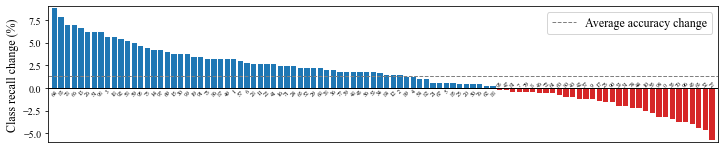

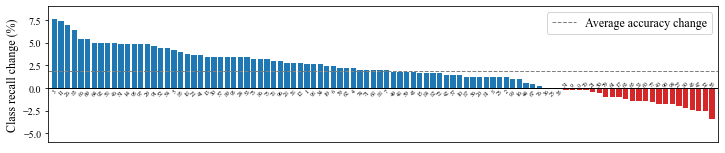

In [34]:
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='gray', linestyle='--', lw=1, label='Average accuracy change')]

i=0
font_size = 12
for y,x, inc,title in [(mixup_diff, mixup_class_idx_str, mixup_inc, 'After Mixup'), (ignore_diff, ignore_class_idx_str, ignore_inc, 'After DropMix-R')]:
    i=i+1
    colors = []
    for diff in y:
        color = 'tab:blue' if diff > 0 else 'tab:red'
        colors.append(color) 
#     ax = plt.subplot(2,1,i)
#     fig, ax = plt.subplots(figsize=(40,8))
#     fig.patch.set_alpha(0)
    fig, ax = plt.subplots(figsize=(12,2.5))
    ax.patch.set_alpha(0)

    ax.bar(x, y, color=colors)
#     plt.gca().spines[['right', 'top', 'bottom', 'left']].set_visible(False) #오른쪽 테두리 제거
#     ax.axes.get_xaxis().set_visible(False)
    # ax.axes.get_yaxis().set_visible(False)

    plt.axhline(y=inc, color='gray', linestyle='--', linewidth=1.0)
    plt.axhline(y=0, color='black', linestyle='-', linewidth=1.0)

    plt.xticks(ticks= []) #y축 tick 제거
    for c, diff in zip(x, y):
        if diff >=0:
            ax.annotate(c, xy=(c,0),
                        horizontalalignment="center",
                        verticalalignment="top",
                       rotation=45, 
                        fontsize=6)
        else:
            ax.annotate(c, xy=(c,0),
                        horizontalalignment="center",
                        verticalalignment="bottom",
                       rotation=45, 
                        fontsize=6)            
#     ax.annotate('Average Performance Improvement', xy=(c,inc),
#                 horizontalalignment="right",
#                 verticalalignment="bottom",
#                fontsize=25)
    # plt.xticks(x, rotation = 45, ha = "right")
    plt.margins(x=0.005, y=0.01, tight=True)
    plt.ylim(-6, 9)
    plt.ylabel("Class recall change (%)", fontsize=font_size)
    plt.rc('ytick', labelsize=font_size-2)
    ax.legend(handles=legend_elements, loc='upper right', fontsize = font_size)
#     plt.title(title, fontsize=font_size)
    plt.savefig('fig/fig2_'+str(i)+'.png', dpi=300, bbox_inches='tight', pad_inches=0.05)
    plt.show()

In [ ]:
x1 = ['Vanilla', 'CutMix', 'DropMix-R']

y1 = [46, 60, 62]
y2 = [54, 42, 48]
y5 = [75.67, 77.07, 77.34]

lim = [58.5, 71.5]
# lim_avg = [73.5, 80.5]

fig = plt.figure(figsize=(6,3.2))
size = 12

ax1 = plt.subplot(1, 2, 1)
# twin = ax1.twinx()
plt.margins(x=0.2, y=0.4)
p1, = ax1.plot(x1, y1, 'o-', color = 'tab:blue', label='Fireguard')
p2, = ax1.plot(x1, y2, 'o-', color = 'tab:red', label='Rifle')
ax1.plot(x1, y5, 'o-', color = 'black', label='Average')
# p3, = twin.plot(x1, y5, 'o-', color = 'black', label='Average')
# twin.set_yticks([])
ax1.set_ylabel('Class recall (%)', fontsize=size+2)
ax1.grid(True, axis='y', alpha = 0.5)
plt.legend(handles = [p1, p2], loc='upper left', fontsize=size-2)
# ax1.set_ylim(lim)
# twin.set_ylim(lim_avg)
# plt.setp(twin.get_yticklabels(), visible=False)
# ax1.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)


y1 = [82, 92, 90]
y2 = [76.6, 72.2, 75.4]
y5 = [76.19, 77.54, 78.09]

lim = [58.5, 71.5]

ax2 = plt.subplot(1, 2, 2)
# twin = ax2.twinx()
p1, = ax2.plot(x1, y1, 'o-', color = 'tab:blue', label='Scooter')
p2, = ax2.plot(x1, y2, 'o-', color = 'tab:red', label='PorcuSpine')
p3, = ax2.plot(x1, y5, 'o-', color = 'black')
# p3, = twin.plot(x1, y5, 'o-', color = 'black', label='Average')
ax2.grid(True, axis='y', alpha = 0.5)
# ax2.set_yticks([])
# ax1.grid(True, axis='y', alpha = 0.5)
# twin.set_ylabel('Average accuracy (%)', fontsize=size+2)
# plt.ylim(lim)
# ax2.set_ylim(lim)
# twin.set_ylim(lim_avg)
# plt.setp(ax2.get_yticklabels(), visible=False)
plt.margins(x=0.2, y=0.4)
plt.legend(handles = [p1, p2], loc='upper left', fontsize=size-2)
# plt.xticks(fontsize=size+4)
ax2.tick_params(axis='both', which='major', labelsize=12)
# twin.tick_params(axis='both', which='major', labelsize=12)b

# plt.tick_params(axis='both', which='minor', labelsize=12)
plt.tight_layout()
plt.savefig('fig3_2.png', dpi=300, bbox_inches='tight', pad_inches=0.05)
plt.show()

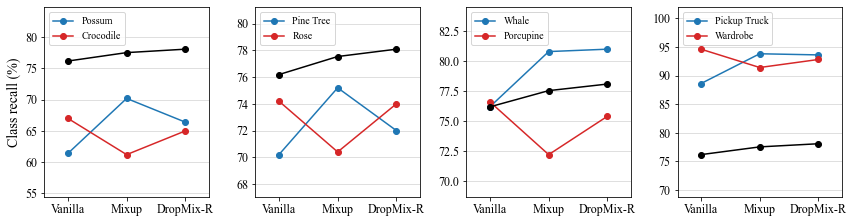

In [13]:
#cifar100 mixup experiment

x1 = ['Vanilla', 'Mixup', 'DropMix-R']
y5 = [76.19, 77.54, 78.09] #Average performance

# lim_avg = [73.5, 80.5]

fig = plt.figure(figsize=(12,3.2))
size = 12

label1 = 'Possum'
y1 = [61.4, 70.2, 66.4]
label2 = 'Crocodile'
y2 = [67, 61.2, 65]
lim = [58.5, 71.5]

ax1 = plt.subplot(1, 4, 1)
# twin = ax1.twinx()
plt.margins(x=0.2, y=0.4)
p1, = ax1.plot(x1, y1, 'o-', color = 'tab:blue', label=label1)
p2, = ax1.plot(x1, y2, 'o-', color = 'tab:red', label=label2)
ax1.plot(x1, y5, 'o-', color = 'black', label='Average')
# p3, = twin.plot(x1, y5, 'o-', color = 'black', label='Average')
# twin.set_yticks([])
ax1.set_ylabel('Class recall (%)', fontsize=size+2)
ax1.grid(True, axis='y', alpha = 0.5)
plt.legend(handles = [p1, p2], loc='upper left', fontsize=size-2)
# ax1.set_ylim(lim)
# twin.set_ylim(lim_avg)
# plt.setp(twin.get_yticklabels(), visible=False)
# ax1.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)


label1 = 'Whale'
y1 = [76.2, 80.8, 81]
label2 = 'Porcupine'
y2 = [76.6, 72.2, 75.4]
lim = [58.5, 71.5]

ax2 = plt.subplot(1, 4, 3)
# twin = ax2.twinx()
p1, = ax2.plot(x1, y1, 'o-', color = 'tab:blue', label=label1)
p2, = ax2.plot(x1, y2, 'o-', color = 'tab:red', label=label2)
p3, = ax2.plot(x1, y5, 'o-', color = 'black')
# p3, = twin.plot(x1, y5, 'o-', color = 'black', label='Average')
ax2.grid(True, axis='y', alpha = 0.5)
# ax2.set_yticks([])
# ax1.grid(True, axis='y', alpha = 0.5)
# twin.set_ylabel('Average accuracy (%)', fontsize=size+2)
# plt.ylim(lim)
# ax2.set_ylim(lim)
# twin.set_ylim(lim_avg)
# plt.setp(ax2.get_yticklabels(), visible=False)
plt.margins(x=0.2, y=0.4)
plt.legend(handles = [p1, p2], loc='upper left', fontsize=size-2)
# plt.xticks(fontsize=size+4)
ax2.tick_params(axis='both', which='major', labelsize=12)
# twin.tick_params(axis='both', which='major', labelsize=12)

label1 = 'Pine Tree'
y1 = [70.2, 75.2, 72.0]
label2 = 'Rose'
y2 = [74.2, 70.4, 74.0]
lim = [58.5, 71.5]

ax1 = plt.subplot(1, 4, 2)
# twin = ax1.twinx()
plt.margins(x=0.2, y=0.4)
p1, = ax1.plot(x1, y1, 'o-', color = 'tab:blue', label=label1)
p2, = ax1.plot(x1, y2, 'o-', color = 'tab:red', label=label2)
ax1.plot(x1, y5, 'o-', color = 'black', label='Average')
# p3, = twin.plot(x1, y5, 'o-', color = 'black', label='Average')
# twin.set_yticks([])
# ax1.set_ylabel('Class recall (%)', fontsize=size+2)
ax1.grid(True, axis='y', alpha = 0.5)
plt.legend(handles = [p1, p2], loc='upper left', fontsize=size-2)
# ax1.set_ylim(lim)
# twin.set_ylim(lim_avg)
# plt.setp(twin.get_yticklabels(), visible=False)
# ax1.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

label1 = 'Pickup Truck'
y1 = [88.6, 93.8, 93.6]
label2 = 'Wardrobe'
y2 = [94.6, 91.4, 92.8]
lim = [58.5, 71.5]

ax1 = plt.subplot(1, 4, 4)
# twin = ax1.twinx()
plt.margins(x=0.2, y=0.4)
p1, = ax1.plot(x1, y1, 'o-', color = 'tab:blue', label=label1)
p2, = ax1.plot(x1, y2, 'o-', color = 'tab:red', label=label2)
ax1.plot(x1, y5, 'o-', color = 'black', label='Average')
# p3, = twin.plot(x1, y5, 'o-', color = 'black', label='Average')
# twin.set_yticks([])
# ax1.set_ylabel('Class recall (%)', fontsize=size+2)
ax1.grid(True, axis='y', alpha = 0.5)
plt.legend(handles = [p1, p2], loc='upper left', fontsize=size-2)
# ax1.set_ylim(lim)
# twin.set_ylim(lim_avg)
# plt.setp(twin.get_yticklabels(), visible=False)
# ax1.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)


# plt.tick_params(axis='both', which='minor', labelsize=12)
plt.tight_layout()
plt.savefig('fig/fig3_1.png', dpi=300, bbox_inches='tight', pad_inches=0.05)
plt.show()

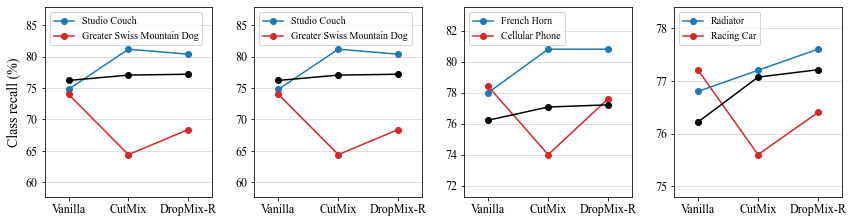

In [41]:
#cifar100 mixup experiment

x1 = ['Vanilla', 'CutMix', 'DropMix-R']
y5 = [76.22, 77.07, 77.21] #Average performance

fig = plt.figure(figsize=(12,3.2))
size = 12

label1 = 'Studio Couch'
y1 = [74.8, 81.2, 80.4]
label2 = 'Greater Swiss Mountain Dog'
y2 = [74.0, 64.4, 68.4 ]
lim = [58.5, 71.5]

ax1 = plt.subplot(1, 4, 1)
# twin = ax1.twinx()
plt.margins(x=0.2, y=0.4)
p1, = ax1.plot(x1, y1, 'o-', color = 'tab:blue', label=label1)
p2, = ax1.plot(x1, y2, 'o-', color = 'tab:red', label=label2)
ax1.plot(x1, y5, 'o-', color = 'black', label='Average')
# p3, = twin.plot(x1, y5, 'o-', color = 'black', label='Average')
# twin.set_yticks([])
# ax1.set_ylabel('Class recall (%)', fontsize=size+2)
ax1.set_ylabel('Class recall (%)', fontsize=size+2)
ax1.grid(True, axis='y', alpha = 0.5)
plt.legend(handles = [p1, p2], loc='upper left', fontsize=size-2)
# ax1.set_ylim(lim)
# twin.set_ylim(lim_avg)
# plt.setp(twin.get_yticklabels(), visible=False)
# ax1.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

ax1 = plt.subplot(1, 4, 2)
# twin = ax1.twinx()
plt.margins(x=0.2, y=0.4)
p1, = ax1.plot(x1, y1, 'o-', color = 'tab:blue', label=label1)
p2, = ax1.plot(x1, y2, 'o-', color = 'tab:red', label=label2)
ax1.plot(x1, y5, 'o-', color = 'black', label='Average')
# p3, = twin.plot(x1, y5, 'o-', color = 'black', label='Average')
# twin.set_yticks([])
ax1.grid(True, axis='y', alpha = 0.5)
plt.legend(handles = [p1, p2], loc='upper left', fontsize=size-2)
# ax1.set_ylim(lim)
# twin.set_ylim(lim_avg)
# plt.setp(twin.get_yticklabels(), visible=False)
# ax1.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)


label1 = 'Radiator'
y1 = [76.8, 77.2, 77.6 ]
label2 = 'Racing Car'
y2 = [77.2, 75.6, 76.4 ]
lim = [58.5, 71.5]

ax2 = plt.subplot(1, 4, 4)
# twin = ax2.twinx()
p1, = ax2.plot(x1, y1, 'o-', color = 'tab:blue', label=label1)
p2, = ax2.plot(x1, y2, 'o-', color = 'tab:red', label=label2)
p3, = ax2.plot(x1, y5, 'o-', color = 'black')
# p3, = twin.plot(x1, y5, 'o-', color = 'black', label='Average')
ax2.grid(True, axis='y', alpha = 0.5)
# ax2.set_yticks([])
# ax1.grid(True, axis='y', alpha = 0.5)
# twin.set_ylabel('Average accuracy (%)', fontsize=size+2)
# plt.ylim(lim)
# ax2.set_ylim(lim)
# twin.set_ylim(lim_avg)
# plt.setp(ax2.get_yticklabels(), visible=False)
plt.margins(x=0.2, y=0.4)
plt.legend(handles = [p1, p2], loc='upper left', fontsize=size-2)
# plt.xticks(fontsize=size+4)
ax2.tick_params(axis='both', which='major', labelsize=12)
# twin.tick_params(axis='both', which='major', labelsize=12)

label1 = 'French Horn'
y1 = [78.0, 80.8, 80.8 ]
label2 = 'Cellular Phone'
y2 = [78.4, 74.0, 77.6 ]
lim = [58.5, 71.5]

ax1 = plt.subplot(1, 4, 3)
# twin = ax1.twinx()
plt.margins(x=0.2, y=0.4)
p1, = ax1.plot(x1, y1, 'o-', color = 'tab:blue', label=label1)
p2, = ax1.plot(x1, y2, 'o-', color = 'tab:red', label=label2)
ax1.plot(x1, y5, 'o-', color = 'black', label='Average')
# p3, = twin.plot(x1, y5, 'o-', color = 'black', label='Average')
# twin.set_yticks([])
# ax1.set_ylabel('Class recall (%)', fontsize=size+2)
ax1.grid(True, axis='y', alpha = 0.5)
plt.legend(handles = [p1, p2], loc='upper left', fontsize=size-2)
# ax1.set_ylim(lim)
# twin.set_ylim(lim_avg)
# plt.setp(twin.get_yticklabels(), visible=False)
# ax1.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

label1 = 'Parallel Bars'
y1 = [71.2, 74.4, 76.4 ]
label2 = 'Rocking Chair'
y2 = [71.6, 69.2, 74.4 ]
lim = [58.5, 71.5]

# plt.tick_params(axis='both', which='minor', labelsize=12)
plt.tight_layout()
plt.savefig('fig/fig3_2.png', dpi=300, bbox_inches='tight', pad_inches=0.05)
plt.show()

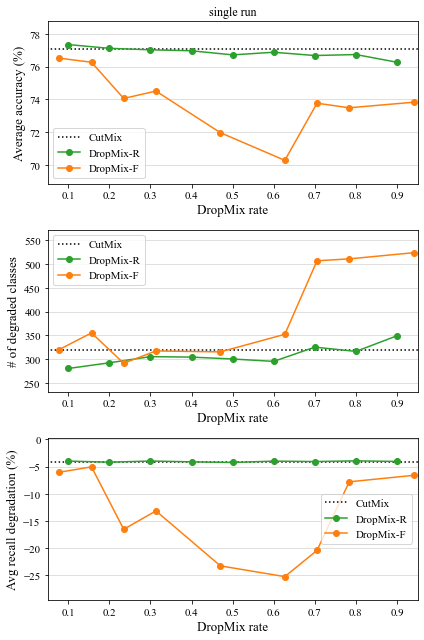

In [82]:
# # degraded class

x1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y1 = [77.34, 77.11, 77.02, 76.96, 76.71, 76.87, 76.67, 76.73, 76.26]
x2 = [0.078369906, 0.156739812, 0.235109718, 0.313479624, 0.470219436, 0.626959248, 0.705329154, 0.78369906, 0.940438871]
y2 = [76.51, 76.26, 74.05, 74.50, 71.96, 70.27, 73.76, 73.48, 73.82]
x3 = [-0.5, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.5]
# y3 = [76.19] * len(x3)
y3 = [77.08] * len(x3)

lim = [0.05, 0.95]
size = 11

fig = plt.figure(figsize=(6,9))
plt.subplot(3, 1, 1)
plt.title('single run')

# plt.margins(x=0.2, y=0.2)
plt.plot(x3, y3, ':', color = 'black', label = 'CutMix')
plt.plot(x1, y1, '-o', color = 'tab:green', label = 'DropMix-R')
plt.plot(x2, y2, '-o', color = 'tab:orange', label = 'DropMix-F')
plt.ylabel('Average accuracy (%)', fontsize=size+2)
plt.xlabel('DropMix rate', fontsize=size+2)

plt.grid(True, axis='y', alpha = 0.5)
plt.xlim(lim)
# plt.ylim([75.75, 78.2])
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.margins(0.2)

plt.legend(loc='best', fontsize=size)
plt.tight_layout()


plt.subplot(3,1,2)
# # degraded class

y1 = [280, 292, 305, 304, 300, 295, 325, 316, 349] #DropMix-R
y2 = [320, 355, 291, 317, 315, 352, 507, 511, 524] #DropMix-F
x3 = [-0.5, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.5]
y3 = [319] * len(x3)

# plt.margins(x=0.2, y=0.2)
plt.plot(x3, y3, ':', color = 'black', label = 'CutMix')
plt.plot(x1, y1, '-o', color = 'tab:green', label = 'DropMix-R')
plt.plot(x2, y2, '-o', color = 'tab:orange', label = 'DropMix-F')
plt.ylabel('# of degraded classes', fontsize=size+2)
plt.xlabel('DropMix rate', fontsize=size+2)

plt.grid(True, axis='y', alpha = 0.5)
plt.xlim(lim)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.margins(0.2)

plt.legend(loc='best', fontsize=size)
plt.tight_layout()

plt.subplot(3,1,3)
y1 = [-3.99, -4.20, -3.98, -4.13, -4.25, -4.00, -4.08, -3.95, -4.06] #DropMix-R
y2 = [-6.04, -5.06, -16.52, -13.14, -23.23, -25.21, -20.39, -7.80, -6.61] #DropMix-F
x3 = [-0.5, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.5]
y3 = [-4.14] * len(x3)

# plt.margins(x=0.2, y=0.2)
plt.plot(x3, y3, ':', color = 'black', label = 'CutMix')
plt.plot(x1, y1, '-o', color = 'tab:green', label = 'DropMix-R')
plt.plot(x2, y2, '-o', color = 'tab:orange', label = 'DropMix-F')
plt.ylabel('Avg recall degradation (%)', fontsize=size+2)
plt.xlabel('DropMix rate', fontsize=size+2)

plt.grid(True, axis='y', alpha = 0.5)
plt.xlim(lim)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.margins(0.2)

plt.legend(loc='center right', fontsize=size)
plt.tight_layout()

plt.savefig('fig/disc_mixup_cifar100_single_run.png', dpi=300, bbox_inches='tight', pad_inches=0.05)
plt.show()

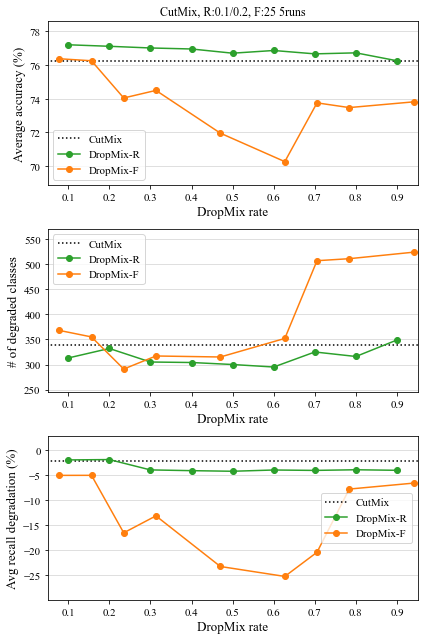

In [81]:
# # degraded class

x1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y1 = [77.21, 77.12, 77.02, 76.96, 76.71, 76.87, 76.67, 76.73, 76.26]
x2 = [0.078369906, 0.156739812, 0.235109718, 0.313479624, 0.470219436, 0.626959248, 0.705329154, 0.78369906, 0.940438871]
y2 = [76.38, 76.26, 74.05, 74.50, 71.96, 70.27, 73.76, 73.48, 73.82]
x3 = [-0.5, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.5]
y3 = [76.22] * len(x3)

lim = [0.05, 0.95]
size = 11

fig = plt.figure(figsize=(6,9))
plt.subplot(3, 1, 1)
plt.title('CutMix, R:0.1/0.2, F:25 5runs')

# plt.margins(x=0.2, y=0.2)
plt.plot(x3, y3, ':', color = 'black', label = 'CutMix')
plt.plot(x1, y1, '-o', color = 'tab:green', label = 'DropMix-R')
plt.plot(x2, y2, '-o', color = 'tab:orange', label = 'DropMix-F')
plt.ylabel('Average accuracy (%)', fontsize=size+2)
plt.xlabel('DropMix rate', fontsize=size+2)

plt.grid(True, axis='y', alpha = 0.5)
plt.xlim(lim)
# plt.ylim([75.75, 78.2])
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.margins(0.2)

plt.legend(loc='best', fontsize=size)
plt.tight_layout()


plt.subplot(3,1,2)
# # degraded class

y1 = [313, 332, 305, 304, 300, 295, 325, 316, 349] #DropMix-R
y2 = [368, 355, 291, 317, 315, 352, 507, 511, 524] #DropMix-F
x3 = [-0.5, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.5]
y3 = [339] * len(x3)

# plt.margins(x=0.2, y=0.2)
plt.plot(x3, y3, ':', color = 'black', label = 'CutMix')
plt.plot(x1, y1, '-o', color = 'tab:green', label = 'DropMix-R')
plt.plot(x2, y2, '-o', color = 'tab:orange', label = 'DropMix-F')
plt.ylabel('# of degraded classes', fontsize=size+2)
plt.xlabel('DropMix rate', fontsize=size+2)

plt.grid(True, axis='y', alpha = 0.5)
plt.xlim(lim)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.margins(0.2)

plt.legend(loc='best', fontsize=size)
plt.tight_layout()

plt.subplot(3,1,3)
y1 = [-1.99, -1.92, -3.98, -4.13, -4.25, -4.00, -4.08, -3.95, -4.06] #DropMix-R
y2 = [-5.07, -5.06, -16.52, -13.14, -23.23, -25.21, -20.39, -7.80, -6.61] #DropMix-F
x3 = [-0.5, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.5]
y3 = [-2.17] * len(x3)

# plt.margins(x=0.2, y=0.2)
plt.plot(x3, y3, ':', color = 'black', label = 'CutMix')
plt.plot(x1, y1, '-o', color = 'tab:green', label = 'DropMix-R')
plt.plot(x2, y2, '-o', color = 'tab:orange', label = 'DropMix-F')
plt.ylabel('Avg recall degradation (%)', fontsize=size+2)
plt.xlabel('DropMix rate', fontsize=size+2)

plt.grid(True, axis='y', alpha = 0.5)
plt.xlim(lim)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.margins(0.2)

plt.legend(loc='center right', fontsize=size)
plt.tight_layout()

plt.savefig('fig/disc_mixup_cifar100_5run_added.png', dpi=300, bbox_inches='tight', pad_inches=0.05)
plt.show()

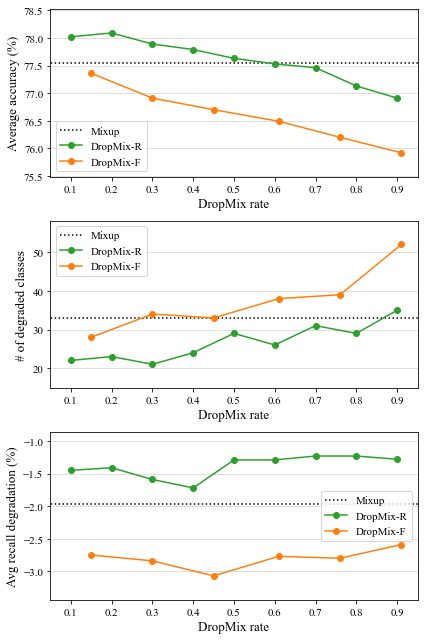

In [5]:
# # degraded class

x1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y1 = [78.02, 78.09, 77.89, 77.79, 77.63, 77.53, 77.46, 77.13, 76.91]
x2 = [0.15, 0.3, 0.45, 0.61, 0.76, 0.91]
y2 = [77.36, 76.91, 76.7, 76.49, 76.2, 75.92]
x3 = [-0.5, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.5]
# y3 = [76.19] * len(x3)
y3 = [77.54] * len(x3)

lim = [0.05, 0.95]
size = 11

fig = plt.figure(figsize=(6,9))
plt.subplot(3, 1, 1)

# plt.margins(x=0.2, y=0.2)
plt.plot(x3, y3, ':', color = 'black', label = 'Mixup')
plt.plot(x1, y1, '-o', color = 'tab:green', label = 'DropMix-R')
plt.plot(x2, y2, '-o', color = 'tab:orange', label = 'DropMix-F')
plt.ylabel('Average accuracy (%)', fontsize=size+2)
plt.xlabel('DropMix rate', fontsize=size+2)

plt.grid(True, axis='y', alpha = 0.5)
plt.xlim(lim)
# plt.ylim([75.75, 78.2])
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.margins(0.2)

plt.legend(loc='best', fontsize=size)
plt.tight_layout()


plt.subplot(3,1,2)
# # degraded class

x1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y1 = [22, 23, 21, 24, 29, 26, 31, 29, 35]
x2 = [0.15, 0.3, 0.45, 0.61, 0.76, 0.91]
y2 = [28, 34, 33, 38, 39, 52]
x3 = [-0.5, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.5]
y3 = [33] * len(x3)

# plt.margins(x=0.2, y=0.2)
plt.plot(x3, y3, ':', color = 'black', label = 'Mixup')
plt.plot(x1, y1, '-o', color = 'tab:green', label = 'DropMix-R')
plt.plot(x2, y2, '-o', color = 'tab:orange', label = 'DropMix-F')
plt.ylabel('# of degraded classes', fontsize=size+2)
plt.xlabel('DropMix rate', fontsize=size+2)

plt.grid(True, axis='y', alpha = 0.5)
plt.xlim(lim)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.margins(0.2)

plt.legend(loc='best', fontsize=size)
plt.tight_layout()

plt.subplot(3,1,3)
x1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y1 = [-1.45, -1.41, -1.59, -1.72, -1.29, -1.29, -1.23, -1.23, -1.28]
x2 = [0.15, 0.3, 0.45, 0.61, 0.76, 0.91]
y2 = [-2.75, -2.84, -3.07, -2.77, -2.8, -2.59]
x3 = [-0.5, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.5]
y3 = [-1.96] * len(x3)

# plt.margins(x=0.2, y=0.2)
plt.plot(x3, y3, ':', color = 'black', label = 'Mixup')
plt.plot(x1, y1, '-o', color = 'tab:green', label = 'DropMix-R')
plt.plot(x2, y2, '-o', color = 'tab:orange', label = 'DropMix-F')
plt.ylabel('Avg recall degradation (%)', fontsize=size+2)
plt.xlabel('DropMix rate', fontsize=size+2)

plt.grid(True, axis='y', alpha = 0.5)
plt.xlim(lim)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.margins(0.2)

plt.legend(loc='center right', fontsize=size)
plt.tight_layout()

plt.savefig('disc_cutmix_imagenet.png', dpi=300, bbox_inches='tight', pad_inches=0.05)
plt.show()

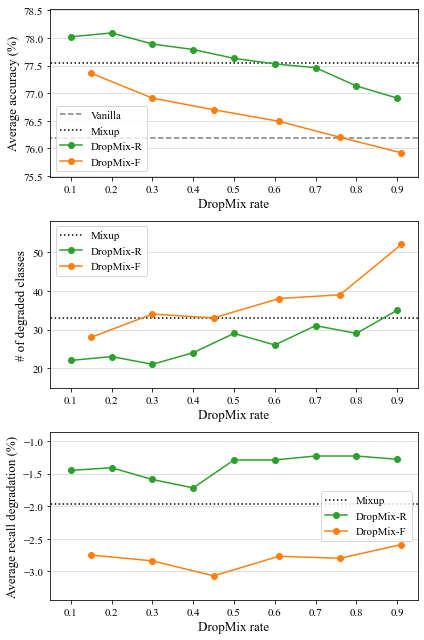

In [50]:
# # degraded class

x1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y1 = [78.02, 78.09, 77.89, 77.79, 77.63, 77.53, 77.46, 77.13, 76.91]
x2 = [0.15, 0.3, 0.45, 0.61, 0.76, 0.91]
y2 = [77.36, 76.91, 76.7, 76.49, 76.2, 75.92]
x3 = [-0.5, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.5]
# y3 = [76.19] * len(x3)
y3 = [77.54] * len(x3)
vanilla = [76.19] * len(x3)

lim = [0.05, 0.95]
size = 11

fig = plt.figure(figsize=(6,9))
plt.subplot(3, 1, 1)

# plt.margins(x=0.2, y=0.2)
plt.plot(x3, vanilla, '--', color = 'gray', label = 'Vanilla')
plt.plot(x3, y3, ':', color = 'black', label = 'Mixup')
plt.plot(x1, y1, '-o', color = 'tab:green', label = 'DropMix-R')
plt.plot(x2, y2, '-o', color = 'tab:orange', label = 'DropMix-F')
plt.ylabel('Average accuracy (%)', fontsize=size+2)
plt.xlabel('DropMix rate', fontsize=size+2)

plt.grid(True, axis='y', alpha = 0.5)
plt.xlim(lim)
# plt.ylim([75.75, 78.2])
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.margins(0.2)

plt.legend(loc='best', fontsize=size)
plt.tight_layout()


plt.subplot(3,1,2)
# # degraded class

x1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y1 = [22, 23, 21, 24, 29, 26, 31, 29, 35]
x2 = [0.15, 0.3, 0.45, 0.61, 0.76, 0.91]
y2 = [28, 34, 33, 38, 39, 52]
x3 = [-0.5, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.5]
y3 = [33] * len(x3)

# plt.margins(x=0.2, y=0.2)
plt.plot(x3, y3, ':', color = 'black', label = 'Mixup')
plt.plot(x1, y1, '-o', color = 'tab:green', label = 'DropMix-R')
plt.plot(x2, y2, '-o', color = 'tab:orange', label = 'DropMix-F')
plt.ylabel('# of degraded classes', fontsize=size+2)
plt.xlabel('DropMix rate', fontsize=size+2)

plt.grid(True, axis='y', alpha = 0.5)
plt.xlim(lim)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.margins(0.2)

plt.legend(loc='best', fontsize=size)
plt.tight_layout()

plt.subplot(3,1,3)
x1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y1 = [-1.45, -1.41, -1.59, -1.72, -1.29, -1.29, -1.23, -1.23, -1.28]
x2 = [0.15, 0.3, 0.45, 0.61, 0.76, 0.91]
y2 = [-2.75, -2.84, -3.07, -2.77, -2.8, -2.59]
x3 = [-0.5, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.5]
y3 = [-1.96] * len(x3)

# plt.margins(x=0.2, y=0.2)
plt.plot(x3, y3, ':', color = 'black', label = 'Mixup')
plt.plot(x1, y1, '-o', color = 'tab:green', label = 'DropMix-R')
plt.plot(x2, y2, '-o', color = 'tab:orange', label = 'DropMix-F')
plt.ylabel('Average recall degradation (%)', fontsize=size+2)
plt.xlabel('DropMix rate', fontsize=size+2)

plt.grid(True, axis='y', alpha = 0.5)
plt.xlim(lim)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.margins(0.2)

plt.legend(loc='center right', fontsize=size)
plt.tight_layout()

plt.savefig('fig/disc_mixup_cifar100.png', dpi=300, bbox_inches='tight', pad_inches=0.05)
plt.show()

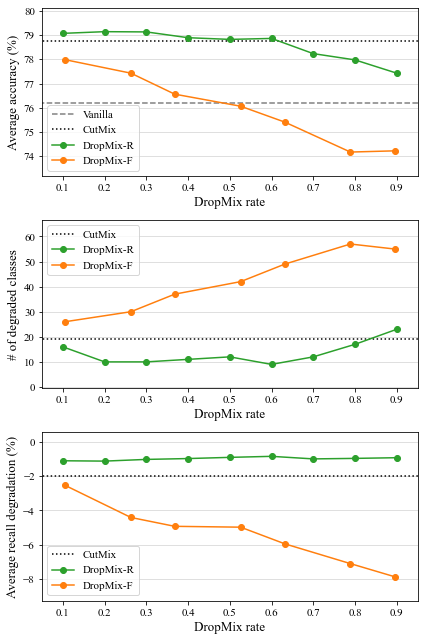

In [49]:
# # degraded class

x1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y1 = [79.08, 79.15, 79.14, 78.90, 78.83, 78.87, 78.24, 77.98, 77.43]
# x2 = [0.105, 0.263, 0.368, 0.526, 0.632, 0.789, 0.895, 1.000]
x2 = [0.105, 0.263, 0.368, 0.526, 0.632, 0.789, 0.895]

# y2 = [77.99, 77.43, 76.56, 76.06, 75.40, 74.16, 74.21, 73.01]
y2 = [77.99, 77.43, 76.56, 76.06, 75.40, 74.16, 74.21]

x3 = [-0.5, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.5]

y3 = [78.75] * len(x3)
vanilla = [76.19] * len(x3)

# lim = [0.05, 1.0]
lim = [0.05, 0.95]
size = 11

fig = plt.figure(figsize=(6,9))
plt.subplot(3, 1, 1)

# plt.margins(x=0.2, y=0.2)
plt.plot(x3, vanilla, '--', color = 'gray', label = 'Vanilla')
plt.plot(x3, y3, ':', color = 'black', label = 'CutMix')
plt.plot(x1, y1, '-o', color = 'tab:green', label = 'DropMix-R')
plt.plot(x2, y2, '-o', color = 'tab:orange', label = 'DropMix-F')
plt.ylabel('Average accuracy (%)', fontsize=size+2)
plt.xlabel('DropMix rate', fontsize=size+2)

plt.grid(True, axis='y', alpha = 0.5)
plt.xlim(lim)
# plt.ylim([75.75, 78.2])
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.margins(0.2)

plt.legend(loc='best', fontsize=size)
plt.tight_layout()


plt.subplot(3,1,2)
# # degraded class

y1 = [16, 10.0, 10, 11, 12, 9, 12, 17, 23]
# y2 = [26, 30, 37, 42, 49, 57, 55, 60]
y2 = [26, 30, 37, 42, 49, 57, 55]

y3 = [19] * len(x3)

# plt.margins(x=0.2, y=0.2)
plt.plot(x3, y3, ':', color = 'black', label = 'CutMix')
plt.plot(x1, y1, '-o', color = 'tab:green', label = 'DropMix-R')
plt.plot(x2, y2, '-o', color = 'tab:orange', label = 'DropMix-F')
plt.ylabel('# of degraded classes', fontsize=size+2)
plt.xlabel('DropMix rate', fontsize=size+2)

plt.grid(True, axis='y', alpha = 0.5)
plt.xlim(lim)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.margins(0.2)

plt.legend(loc='best', fontsize=size)
plt.tight_layout()

plt.subplot(3,1,3)
y1 = [-1.08, -1.1, -1.00, -0.95, -0.88, -0.82, -0.97, -0.94, -0.90]
# y2 = [-2.52, -4.41, -4.93, -4.98, -5.96, -7.12, -7.89, -9.18]
y2 = [-2.52, -4.41, -4.93, -4.98, -5.96, -7.12, -7.89]

x3 = [-0.5, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.5]
y3 = [-1.96] * len(x3)

# plt.margins(x=0.2, y=0.2)
plt.plot(x3, y3, ':', color = 'black', label = 'CutMix')
plt.plot(x1, y1, '-o', color = 'tab:green', label = 'DropMix-R')
plt.plot(x2, y2, '-o', color = 'tab:orange', label = 'DropMix-F')
plt.ylabel('Average recall degradation (%)', fontsize=size+2)
plt.xlabel('DropMix rate', fontsize=size+2)

plt.grid(True, axis='y', alpha = 0.5)
plt.xlim(lim)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.margins(0.2)

plt.legend(loc='lower left', fontsize=size)
plt.tight_layout()

plt.savefig('fig/disc_cutmix_cifar100.png', dpi=300, bbox_inches='tight', pad_inches=0.05)
plt.show()

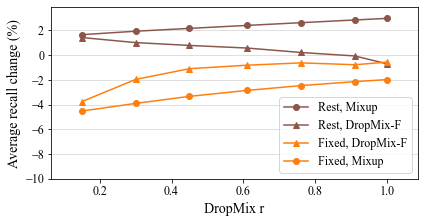

In [4]:
# # degraded class

x = [0.15, 0.3, 0.45, 0.61, 0.76, 0.91, 1]
y1 = [-3.76, -1.96, -1.09, -0.81, -0.62, -0.77, -0.56]
y2 = [1.43, 1.02, 0.79, 0.58, 0.22, -0.06, -0.7]
y3 = [-4.52, -3.9, -3.33, -2.85, -2.46, -2.14, -1.97]
y4 = [1.66, 1.94, 2.17, 2.41, 2.63, 2.85, 2.98]

lim = [-10, 3.9]
size = 12

fig = plt.figure(figsize=(6,3.2))

# plt.margins(x=0.2, y=0.2)
plt.plot(x, y4, '-o', color = 'tab:brown', label = 'Rest, Mixup')
plt.plot(x, y2, '-^', color = 'tab:brown', label = 'Rest, DropMix-F')
plt.plot(x, y1, '-^', color = 'tab:orange', label = 'Fixed, DropMix-F')
plt.plot(x, y3, '-o', color = 'tab:orange', label = 'Fixed, Mixup')



plt.ylabel('Average recall change (%)', fontsize=size+2)
plt.xlabel('DropMix r', fontsize=size+2)

plt.grid(True, axis='y', alpha = 0.5)
plt.ylim(lim)
plt.margins(0.1)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

plt.legend(loc='best', fontsize=12)
plt.tight_layout()
plt.savefig('fig/disc_2.png', dpi=300, bbox_inches='tight', pad_inches=0.05)
plt.show()

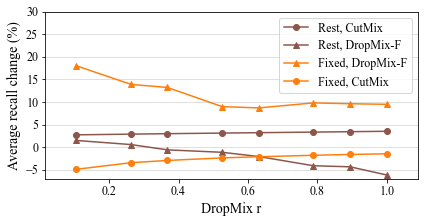

In [101]:
# # degraded class

x = [0.105, 0.263, 0.368, 0.526, 0.632, 0.789, 0.895, 1.000]
y1 = [18.00, 13.88, 13.20, 8.96, 8.68, 9.79, 9.60, 9.47]
y2 = [1.48, 0.57, -0.60, -1.14, -2.08, -4.11, -4.35, -6.15]
y3 = [-4.90, -3.44, -2.94, -2.38, -2.12, -1.80, -1.62, -1.47]
y4 = [2.72, 2.88, 2.98, 3.11, 3.20, 3.33, 3.42, 3.51]


lim = [-7, 30]
size = 12

fig = plt.figure(figsize=(6,3.2))

# plt.margins(x=0.2, y=0.2)
plt.plot(x, y4, '-o', color = 'tab:brown', label = 'Rest, CutMix')
plt.plot(x, y2, '-^', color = 'tab:brown', label = 'Rest, DropMix-F')
plt.plot(x, y1, '-^', color = 'tab:orange', label = 'Fixed, DropMix-F')
plt.plot(x, y3, '-o', color = 'tab:orange', label = 'Fixed, CutMix')



plt.ylabel('Average recall change (%)', fontsize=size+2)
plt.xlabel('DropMix r', fontsize=size+2)

plt.grid(True, axis='y', alpha = 0.5)
plt.ylim(lim)
plt.margins(0.1)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

plt.legend(loc='best', fontsize=12)
plt.tight_layout()
plt.savefig('fig/disc_2_cutmix.png', dpi=300, bbox_inches='tight', pad_inches=0.05)
plt.show()